In [1]:
import networkx as nx
from typing import Union
from typeguard import typechecked
from itertools import combinations, chain
from matplotlib import pyplot as plt

In [2]:
class State:
    @typechecked
    def __init__(self, 
                 left: Union[list, tuple, set],
                 right: Union[list, tuple, set]):
        self._left = list(left)
        self._right = list(right)
    
    @property
    def left(self):
        return self._left

    @property
    def right(self):
        return self._right
    
    def __eq__(self, other):
        return hash(self) == hash(other)
    
    def __hash__(self):
        left_hash = hash(frozenset(self.left))
        right_hash = hash(frozenset(self.right))
        return left_hash * 10 + right_hash
    
    def __str__(self):
        return "State {\n  left: %s,\n  right: %s\n}" % (self.left, self.right)
    
    def __repr__(self):
        return str(self)

In [3]:
wolf = 'Wolf'
goat = 'Goat'
cabbage = 'Cabbage'
items = set([wolf, goat, cabbage])

In [4]:
init_state = State([wolf, goat, cabbage], [])
init_state

State {
  left: ['Wolf', 'Goat', 'Cabbage'],
  right: []
}

In [5]:
final_state = State([], [wolf, goat, cabbage])
final_state

State {
  left: [],
  right: ['Wolf', 'Goat', 'Cabbage']
}

In [6]:
combos3 = combinations(items, 3)
combos2 = combinations(items, 2)
combos1 = combinations(items, 1)
combos0 = combinations(items, 0)

combos = chain(combos3, combos2, combos1, combos0)

In [7]:
states = [State(left=c, right=items.difference(c)) for c in combos]
states

[State {
   left: ['Wolf', 'Goat', 'Cabbage'],
   right: []
 },
 State {
   left: ['Wolf', 'Goat'],
   right: ['Cabbage']
 },
 State {
   left: ['Wolf', 'Cabbage'],
   right: ['Goat']
 },
 State {
   left: ['Goat', 'Cabbage'],
   right: ['Wolf']
 },
 State {
   left: ['Wolf'],
   right: ['Goat', 'Cabbage']
 },
 State {
   left: ['Goat'],
   right: ['Wolf', 'Cabbage']
 },
 State {
   left: ['Cabbage'],
   right: ['Wolf', 'Goat']
 },
 State {
   left: [],
   right: ['Wolf', 'Goat', 'Cabbage']
 }]

In [8]:
viol1 = [cabbage, goat]
viol1_diff = items.difference(viol1)
viol2 = [goat, wolf]
viol2_diff = items.difference(viol2)

invalid_states = [
    State(viol1, viol1_diff),
    State(viol1_diff, viol1),
    State(viol2, viol2_diff),
    State(viol2_diff, viol2)
]

In [9]:
state_space = nx.DiGraph()
state_space.add_nodes_from(states)

In [10]:
edges = []
for from_state in states:
    for to_state in states:
        if (from_state == init_state) and (to_state == final_state):
            continue
        if from_state == to_state:
            continue
        if (to_state in invalid_states) or (from_state in invalid_states):
            continue
        cost = 1e-5
        edges.append((from_state, to_state, cost))

state_space.add_weighted_edges_from(edges)

In [11]:
def adjust_plot_margin():
    plot_margin = 0.5
    x0, x1, y0, y1 = plt.axis()

    plt.axis((x0 - plot_margin,
              x1 + plot_margin,
              y0 - plot_margin,
              y1 + plot_margin))

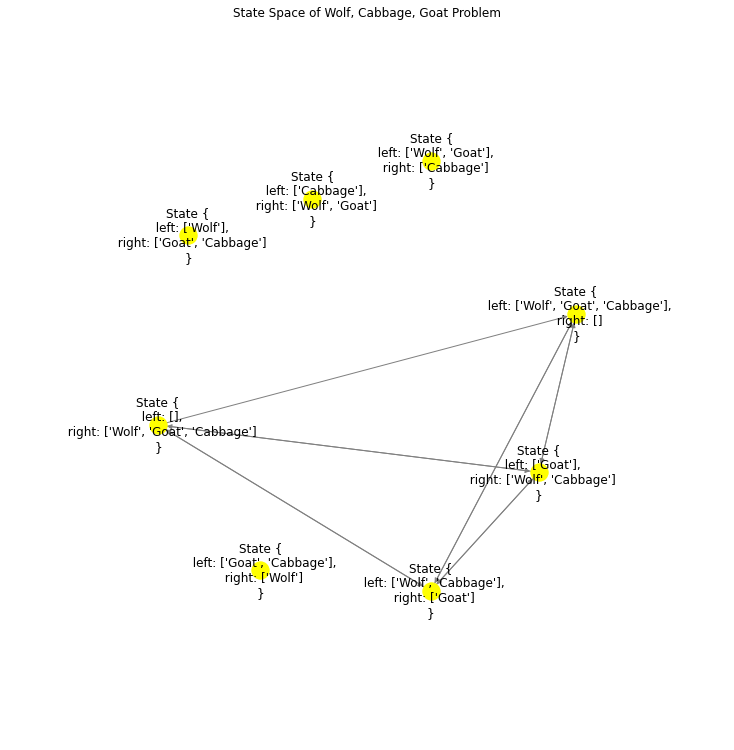

In [12]:
plt.figure(figsize=(10, 10))
nx.draw(state_space, 
        with_labels=True, 
        node_color='yellow',
        edge_color='gray')
adjust_plot_margin()
plt.title('State Space of Wolf, Cabbage, Goat Problem')
plt.show()

In [13]:
path = nx.algorithms.shortest_path(state_space, init_state, final_state)
path

[State {
   left: ['Wolf', 'Goat', 'Cabbage'],
   right: []
 },
 State {
   left: ['Wolf', 'Cabbage'],
   right: ['Goat']
 },
 State {
   left: [],
   right: ['Wolf', 'Goat', 'Cabbage']
 }]

In [14]:
path_graph = nx.Graph()
path_graph.add_nodes_from(path)

for i in range(1, len(path)):
    path_graph.add_edge(path[i - 1], path[i])

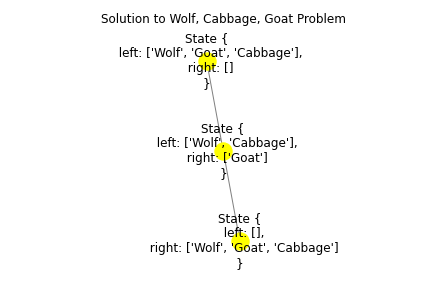

In [17]:
nx.draw(path_graph, with_labels=True, 
        node_color='yellow',
       edge_color='gray')
adjust_plot_margin()
plt.suptitle('Solution to Wolf, Cabbage, Goat Problem')
plt.show()